# QEM Benchmark

Produce the tables and QEM comparison plots for the accompanying paper.

First, define the problem:

In [1]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt
from symmer.symplectic import PauliwordOp, QuantumState
from symmer.utils import exact_gs_energy

qem_directory =  os.getcwd()
print(qem_directory)
ham_data_dir = os.path.join(qem_directory, 'data/hamiltonian')
qem_data_dir = os.path.join(qem_directory, 'data/QEM_benchmark')

filename = 'HCl_STO-3G_SINGLET_JW.json'
    
with open(os.path.join(ham_data_dir, filename), 'r') as infile:
    data_dict = json.load(infile)

hf_energy = data_dict['data']['calculated_properties']['HF']['energy']
mp2_energy = data_dict['data']['calculated_properties']['MP2']['energy']
ccsd_energy = data_dict['data']['calculated_properties']['CCSD']['energy']
fci_energy = data_dict['data']['calculated_properties']['FCI']['energy']

/home/tweaving/qc-research/quantum-error-mitigation


In [2]:
####### Contextual Subspace Hamiltonian #######

ham_cs_dict = {'III': (-453.09074243348186+0j), 'IIZ': (0.3938279139008882+0j), 'IZI': (0.6207540014723985+0j), 'IZZ': (0.8467205227384085+0j), 'ZII': (0.6207540014723985+0j), 'ZIZ': (0.8467205227384084+0j), 'ZZI': (0.2583692120830724+0j), 'ZZZ': (0.23804868510762295+0j), 'IIX': (-0.015457549840655714+0j), 'IZX': (0.015457549840655714-0j), 'ZIX': (0.015457549840655714+0j), 'ZZX': (-0.015457549840655714+0j), 'IXI': (0.004504380403727218+0j), 'IXZ': (-0.004504380403727218+0j), 'ZXI': (0.06195857194191802+0j), 'ZXZ': (-0.06195857194191802+0j), 'IXX': (-0.009644441995559343+0j), 'IYY': (-0.009644441995559343+0j), 'ZXX': (0.009644441995559343+0j), 'ZYY': (0.009644441995559343+0j), 'XII': (-0.004504380403727218+0j), 'XIZ': (0.004504380403727218+0j), 'XZI': (-0.06195857194191803+0j), 'XZZ': (0.061958571941918006+0j), 'XIX': (0.009644441995559343+0j), 'XZX': (-0.009644441995559343+0j), 'YIY': (0.009644441995559343-0j), 'YZY': (-0.009644441995559343+0j), 'YYI': (-0.05559874279713038+0j), 'YYZ': (0.05559874279713038+0j), 'XXX': (-0.03521948529328592+0j), 'XYY': (-0.03521948529328592+0j), 'YXY': (-0.03521948529328592+0j), 'YYX': (0.03521948529328592-0j)}
num_op_cs_dict = {'III': (17+0j), 'IIZ': (-1+0j), 'IZI': (-0.5+0j), 'IZZ': (-0.5+0j), 'ZII': (-0.5+0j), 'ZIZ': (-0.5+0j)}
spin_op_cs_dict = {'IZI': (0.25+0j), 'IZZ': (0.25-0j), 'ZII': (-0.25+0j), 'ZIZ': (-0.25+0j)}

ham_cs = PauliwordOp.from_dictionary(ham_cs_dict)
num_op_cs = PauliwordOp.from_dictionary(num_op_cs_dict)
spin_op_cs = PauliwordOp.from_dictionary(spin_op_cs_dict)
# true ground state
psi_array = np.array(
    [
        [-3.92075303e-03+0.j],
        [ 1.16802197e-01+0.j],
        [ 1.53814406e-05+0.j],
        [-3.17010388e-02+0.j],
        [-6.70251842e-06+0.j],
        [ 3.17077325e-02+0.j],
        [ 9.91827641e-01+0.j],
        [ 2.46874043e-02+0.j]
    ]
)

true_energy = fci_energy - ham_cs.coeff_vec[0]

print(true_energy)

(-2.0663243596669645+0j)


# Postprocessing and comparison

In [3]:
from postprocessing.process_HCl_experiments import process_all

import warnings
warnings.filterwarnings("ignore")

In [76]:
final_estimates_by_system = {}

systems = {
    'ibmq_montreal':{'threshold':0.38, 'threshold_2':0.17},
    'ibmq_kolkata':{'threshold':0.5, 'threshold_2':0.33},
    'ibmq_mumbai':{'threshold':0.08, 'threshold_2':0.72},
    'ibm_auckland':{'threshold':0.47, 'threshold_2':0.82},
    'ibm_cairo':{'threshold':0.5, 'threshold_2':0.22},
    'ibm_hanoi':{'threshold':0.24, 'threshold_2':0.85},
    'ibmq_toronto':{'threshold':0.76, 'threshold_2':0.98},
    'ibm_geneva':{'threshold':0.39, 'threshold_2':0.16}
}

for system in systems:
    final_estimates = process_all(
        system=system, 
        n_resamples=1000, 
        threshold=systems[system]['threshold'], 
        threshold_2=systems[system]['threshold_2']
    )
    final_estimates_by_system[system] = final_estimates

Processing quantum experiment data from ibmq_montreal...
RAW complete
ZNE complete
MEM complete
MEM+ZNE complete
SYM complete
SYM+ZNE comlete
MEM+SYM complete
MEM+SYM+ZNE complete
DSP complete
DSP+TP complete
MEM+DSP complete
MEM+DSP+TP complete
DSP+ZNE complete
DSP+TP+ZNE complete
MEM+DSP+ZNE complete
MEM+DSP+TP+ZNE complete
Processing quantum experiment data from ibmq_kolkata...
RAW complete
ZNE complete
MEM complete
MEM+ZNE complete
SYM complete
SYM+ZNE comlete
MEM+SYM complete
MEM+SYM+ZNE complete
DSP complete
DSP+TP complete
MEM+DSP complete
MEM+DSP+TP complete
DSP+ZNE complete
DSP+TP+ZNE complete
MEM+DSP+ZNE complete
MEM+DSP+TP+ZNE complete
Processing quantum experiment data from ibmq_mumbai...
RAW complete
ZNE complete
MEM complete
MEM+ZNE complete
SYM complete
SYM+ZNE comlete
MEM+SYM complete
MEM+SYM+ZNE complete
DSP complete
DSP+TP complete
MEM+DSP complete
MEM+DSP+TP complete
DSP+ZNE complete
DSP+TP+ZNE complete
MEM+DSP+ZNE complete
MEM+DSP+TP+ZNE complete
Processing quantum 

# Produce tables

In [77]:
def iter_paths(d, return_complete=True):
    def iter1(d, path):
        paths = []
        for k, v in d.items():
            if isinstance(v, dict):
                paths += iter1(v, path + [k])
            paths.append((path + [k], v))
        return paths
    paths = iter1(d, [])
    if not return_complete:
        return paths
    else:
        complete_paths = {tuple(a):b for a,b in paths if not isinstance(b, dict)}
        return list(complete_paths.items())


data_decomp = iter_paths({s:final_estimates_by_system[s] for s in systems})

Average error suppression

In [78]:
error_suppresion_dict={}

for key, val in iter_paths(final_estimates_by_system):
    device = key[0]
    if device not in ['ibm_hanoi', 'ibm_geneva']:
        mit_technique = key[1]
        estimate_type = key[2]

        raw_energy = final_estimates_by_system[device]['RAW']['energy']
        raw_stddev = final_estimates_by_system[device]['RAW']['stddev']

        if estimate_type == 'energy':
            error_suppresion_dict.setdefault(
                ('Error Suppression [%]'), {}
            ).setdefault(mit_technique, []).append(
                1-(abs(val - true_energy)/abs(raw_energy - true_energy))
            )
        elif estimate_type == 'stddev':
            error_suppresion_dict.setdefault(
                ('Change in Std Dev'), {}
            ).setdefault(mit_technique, []).append(val/raw_stddev)
            
error_suppresion_dict_formatted = {}
for top in ['Error Suppression [%]', 'Change in Std Dev']:
    for mit_strat in list(final_estimates_by_system['ibmq_montreal'].keys()):
        if top=='Error Suppression [%]':
            fact=100
        else:
            fact=1
        mean = np.mean(error_suppresion_dict[(top)][mit_strat]).real * fact
        best = np.max(error_suppresion_dict[(top)][mit_strat]).real * fact
        worst= np.min(error_suppresion_dict[(top)][mit_strat]).real * fact
        if top == 'Change in Std Dev':
            best, worst = worst, best

        error_suppresion_dict_formatted.setdefault((top, 'Mean'), {})[mit_strat] = mean
        error_suppresion_dict_formatted.setdefault((top, 'Best'), {})[mit_strat] = best
        error_suppresion_dict_formatted.setdefault((top, 'Worst'), {})[mit_strat] = worst
print(error_suppresion_dict_formatted.keys())
#error_suppresion_dict_formatted = dict([list(error_suppresion_dict_formatted.items())[o] for o in frag])

dict_keys([('Error Suppression [%]', 'Mean'), ('Error Suppression [%]', 'Best'), ('Error Suppression [%]', 'Worst'), ('Change in Std Dev', 'Mean'), ('Change in Std Dev', 'Best'), ('Change in Std Dev', 'Worst')])


In [79]:
from pandas import DataFrame

df_err_supp = DataFrame.from_dict(error_suppresion_dict_formatted)
df_err_supp = df_err_supp.sort_values(by=('Error Suppression [%]',  'Mean'), ascending=False)
df_err_supp = df_err_supp.drop('RAW')

In [80]:
print(
    df_err_supp.to_latex(
        caption='Average error suppression and change in standard deviation under each error mitigation strategy evaluated across all 27-qubit Falcon IBM Quantum devices (excluding ibm\_hanoi and ibm\_geneva, which did not perform well as seen in the ZNE plots of Figure \\ref{fig:ZNE_fits} and Table \\ref{mitigation_benchmark}). Ordered by decreasing mean error suppression.', 
        label='err_suppression',
        float_format="%.3f",
        escape=False,
        #index=False
    )
)

\begin{table}
\centering
\caption{Average error suppression and change in standard deviation under each error mitigation strategy evaluated across all 27-qubit Falcon IBM Quantum devices (excluding ibm\_hanoi and ibm\_geneva, which did not perform well as seen in the ZNE plots of Figure \ref{fig:ZNE_fits} and Table \ref{mitigation_benchmark}). Ordered by decreasing mean error suppression.}
\label{err_suppression}
\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{3}{l}{Error Suppression [%]} & \multicolumn{3}{l}{Change in Std Dev} \\
{} &                  Mean &   Best &    Worst &              Mean &  Best &  Worst \\
\midrule
MEM+SYM+ZNE    &                94.327 & 99.392 &   88.101 &             3.680 & 1.078 &  7.207 \\
DSP+TP         &                93.253 & 99.713 &   80.793 &             2.543 & 1.583 &  3.833 \\
MEM+DSP+TP     &                92.661 & 98.601 &   75.508 &             2.113 & 0.789 &  3.472 \\
MEM+ZNE        &                87.094 & 97.877 &   69.185 &      

Full comparison

In [81]:
formatted_data = {}
for (sys, mem_type, val_type), val in data_decomp:
    if budget is None:
        budget='initial'
    if val_type in ['energy','stddev']:
        if val_type=='energy':
            val_updated = abs(true_energy-val.real)*1e3
            val_updated = '\\textbf{'+format(val_updated, ".1f")+'}'
            val_type_formatted = '\\textbf{bias}'
        else:
            val_updated = val.real*1e3
            val_updated = format(val_updated, ".1f")
            val_type_formatted = '$\\sigma$'
        pre, suf = sys.split('_')
        sys_formatted = pre+'\_'+suf
        formatted_data.setdefault((sys_formatted, val_type_formatted), {})[mem_type] = val_updated
        
frag = np.array([0,2,4,1,3,5])
order = []
for i in range(6):
    order += list(frag+i*6)        

df = DataFrame.from_dict(formatted_data, orient='columns').T
order = np.append(
    0, 
    np.argsort(
        np.asarray(
            list(error_suppresion_dict_formatted[('Error Suppression [%]', 'Mean')].values())[1:]
        )
    )[::-1]+1
)
df = df[[df.columns[i] for i in order]]
df

RAW    MEM+SYM+ZNE         DSP+TP  \
ibmq\_montreal \textbf{bias}  \textbf{294.7}  \textbf{16.7}   \textbf{0.8}   
               $\sigma$                  2.9           13.4            4.6   
ibmq\_kolkata  \textbf{bias}   \textbf{85.5}   \textbf{9.4}   \textbf{1.4}   
               $\sigma$                  2.0            2.2            7.7   
ibmq\_mumbai   \textbf{bias}  \textbf{235.4}   \textbf{1.4}  \textbf{37.2}   
               $\sigma$                  2.7           12.9            8.4   
ibm\_auckland  \textbf{bias}   \textbf{73.4}   \textbf{8.7}   \textbf{0.9}   
               $\sigma$                  2.2            2.4            6.5   
ibm\_cairo     \textbf{bias}  \textbf{208.9}   \textbf{4.1}   \textbf{4.8}   
               $\sigma$                  2.6           18.5            4.2   
ibm\_hanoi     \textbf{bias}   \textbf{98.5}  \textbf{96.4}  \textbf{44.1}   
               $\sigma$                  2.5           12.7            7.6   
ibmq\_toronto  \textbf{bias}  \textbf{125.9}   \textbf{3.6}  \textbf{24.2}   
               $\sigma$                  2.2            7.5            4.8   
ibm\_geneva    \textbf{bias}  \textbf{200.9}  \textbf{53.0}  \textbf{18.4}   
               $\sigma$                  2.7           81.4            4.7   

                                 MEM+DSP+TP         MEM+ZNE         MEM+SYM  \
ibmq\_montreal \textbf{bias}   \textbf{6.9}   \textbf{19.0}   \textbf{30.2}   
               $\sigma$                 3.7            16.5             1.7   
ibmq\_kolkata  \textbf{bias}   \textbf{3.3}    \textbf{1.8}   \textbf{28.1}   
               $\sigma$                 6.9             7.4             1.5   
ibmq\_mumbai   \textbf{bias}   \textbf{3.3}   \textbf{36.0}   \textbf{23.8}   
               $\sigma$                 6.9            12.9             1.6   
ibm\_auckland  \textbf{bias}   \textbf{7.1}    \textbf{5.8}   \textbf{22.3}   
               $\sigma$                 5.5             2.6             1.5   
ibm\_cairo     \textbf{bias}   \textbf{4.7}   \textbf{64.4}    \textbf{7.0}   
               $\sigma$                 5.3            64.2             1.3   
ibm\_hanoi     \textbf{bias}  \textbf{31.1}  \textbf{157.9}   \textbf{15.5}   
               $\sigma$                 7.3            23.8             1.6   
ibmq\_toronto  \textbf{bias}  \textbf{30.8}   \textbf{18.8}   \textbf{21.4}   
               $\sigma$                 1.8             4.5             1.6   
ibm\_geneva    \textbf{bias}   \textbf{3.6}  \textbf{109.5}  \textbf{100.6}   
               $\sigma$                 7.8           148.4             1.9   

                                    SYM+ZNE             MEM             SYM  \
ibmq\_montreal \textbf{bias}  \textbf{14.9}   \textbf{85.9}   \textbf{59.2}   
               $\sigma$                14.0             2.0             1.9   
ibmq\_kolkata  \textbf{bias}  \textbf{40.3}   \textbf{28.2}   \textbf{57.1}   
               $\sigma$                 1.9             1.5             1.8   
ibmq\_mumbai   \textbf{bias}  \textbf{18.6}   \textbf{42.9}   \textbf{44.7}   
               $\sigma$                15.5             1.7             1.7   
ibm\_auckland  \textbf{bias}  \textbf{29.1}   \textbf{25.4}   \textbf{38.1}   
               $\sigma$                 0.8             1.5             1.7   
ibm\_cairo     \textbf{bias}  \textbf{26.5}    \textbf{6.9}   \textbf{64.0}   
               $\sigma$                22.0             1.3             1.9   
ibm\_hanoi     \textbf{bias}  \textbf{64.5}   \textbf{20.8}   \textbf{30.8}   
               $\sigma$                12.2             1.7             1.9   
ibmq\_toronto  \textbf{bias}  \textbf{11.0}   \textbf{28.6}   \textbf{37.9}   
               $\sigma$                11.5             1.7             1.8   
ibm\_geneva    \textbf{bias}  \textbf{65.9}  \textbf{100.6}  \textbf{153.7}   
               $\sigma$                24.3             1.9             2.3   

                          

In [82]:
print(
    df.to_latex(
        caption='Comparison of errors and standard deviation for various error-mitigation strategies performed across a suite of IBM Quantum devices with a shot budget $B=10^6$ and energies given in mHa. The columns are ordered left-to-right by decreasing average error suppresion (detailed in Table \\ref{err_suppression}), with the exception of the raw estimate which is provided for reference. Note the following \\textit{classical} quantum chemistry error benchmarks:\ HF - 21.621mHa, MP2 - 7.360mHa, Chemical Precision - 1.6mHa.', 
        label=f'mitigation_benchmark',
        #index=False,
        float_format="%.3f",
        escape=False,
        header=['\\rotatebox{90}{' + c + '}' for c in df.columns]
    )
)

\begin{table}
\centering
\caption{Comparison of errors and standard deviation for various error-mitigation strategies performed across a suite of IBM Quantum devices with a shot budget $B=10^6$ and energies given in mHa. The columns are ordered left-to-right by decreasing average error suppresion (detailed in Table \ref{err_suppression}), with the exception of the raw estimate which is provided for reference. Note the following \textit{classical} quantum chemistry error benchmarks:\ HF - 21.621mHa, MP2 - 7.360mHa, Chemical Precision - 1.6mHa.}
\label{mitigation_benchmark}
\begin{tabular}{llllllllllllllllll}
\toprule
            &          & \rotatebox{90}{RAW} & \rotatebox{90}{MEM+SYM+ZNE} & \rotatebox{90}{DSP+TP} & \rotatebox{90}{MEM+DSP+TP} & \rotatebox{90}{MEM+ZNE} & \rotatebox{90}{MEM+SYM} & \rotatebox{90}{SYM+ZNE} & \rotatebox{90}{MEM} & \rotatebox{90}{SYM} & \rotatebox{90}{MEM+DSP+TP+ZNE} & \rotatebox{90}{DSP+TP+ZNE} & \rotatebox{90}{ZNE} & \rotatebox{90}{MEM+DSP+ZNE} & \rotatebo

Average error suppression required for cheical precision:

In [83]:
np.mean(
    (
        1 - 0.0016 / abs(
            true_energy-np.array([d['RAW']['energy'] 
                                  for s, d in final_estimates_by_system.items()]
                                )
        )
    )
)*100

98.78369738162124

ibmq_montreal


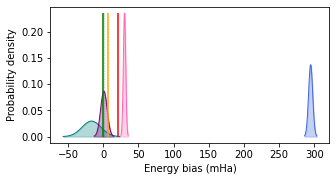

ibmq_kolkata


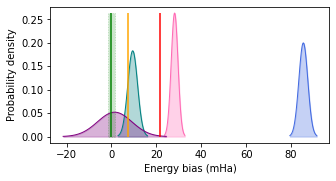

ibmq_mumbai


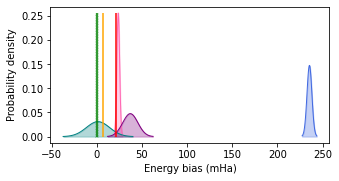

ibm_auckland


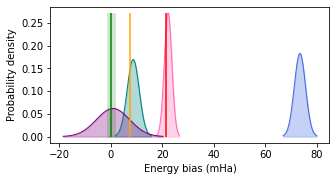

ibm_cairo


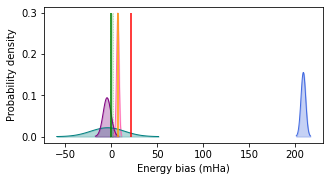

ibm_hanoi


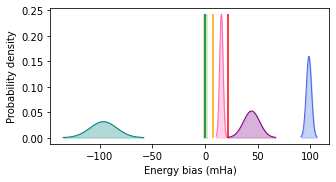

ibmq_toronto


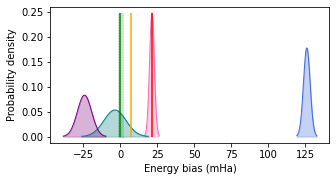

ibm_geneva


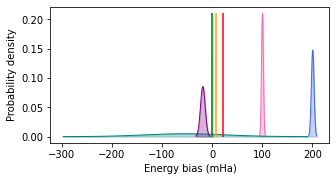

In [85]:
from postprocessing.statistics import bias, stddev
import scipy.stats as stats

def plot_normal(ax, data_in, ref, label='RAW', color='blue'):
    mu = (data_in['energy']-ref)*1e3
    sigma=data_in['stddev']*1e3
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    gaussian = stats.norm.pdf(x, mu, sigma)
    ax.plot(x, gaussian, color=color, lw=1)
    ax.fill_between(x, gaussian, color=color, alpha=0.3)
    
for system in systems:
    print(system)
    
    fig, ax = plt.subplots(figsize=(5,2.5))
    # RAW
    plot_normal(ax, final_estimates_by_system[system]['RAW'], true_energy, label='RAW', color='royalblue')
    # MEM+SYM
    plot_normal(ax, final_estimates_by_system[system]['MEM+SYM'], true_energy, label='MEM+SV', color='hotpink')
    # ZNE
    plot_normal(ax, final_estimates_by_system[system]['MEM+SYM+ZNE'], true_energy, label='MEM+SV+ZNE', color='teal')
    # DSP+TP
    plot_normal(ax, final_estimates_by_system[system]['DSP+TP'], true_energy, label='DSP+TP', color='purple')
    
    ymax = ax.dataLim.bounds[-1]
    ax.vlines((hf_energy-ham_cs.coeff_vec[0]-true_energy)*1e3, 0, ymax, label='HF', color='red')
    ax.vlines((mp2_energy-ham_cs.coeff_vec[0]-true_energy)*1e3, 0, ymax, label='MP2', color='orange')
    ax.vlines(0, 0, ymax, color='green', label='FCI')
    ax.fill_betweenx([0, ymax],-1.6,1.6, color='green', ls=':', alpha=0.2, label='Chemical\nprecision')

    ax.set_xlabel('Energy bias (mHa)')
    ax.set_ylabel('Probability density')
    
    #ax.legend(ncol=2)
    
    #ax.axis('off')
    #fig.legend(ncol=8, bbox_to_anchor=(0.5,-0.2))
    
    #fig.savefig(f'plots/legend_hist.png', dpi=300, bbox_inches='tight')
    fig.savefig(f'plots/{system}_hist.png', dpi=300, bbox_inches='tight')
    
    plt.show()

# Hardware specification

In [41]:
from postprocessing.process_HCl_experiments import get_data

system_data = {}

for system in systems:
    print(f'Processing quantum experiment data from {system}...')
    
    data_raw, data_zne, data_dsp, data_dsp_zne = get_data(system)


    QV = data_dsp['hardware_spec']['quantum_volume']
    opt_qubits = list(data_dsp['results']['optimal_qubit_cluster'].values())
    opt_qubits_str = ', '.join([str(i) for i in opt_qubits])
    T1_vals = [data_dsp['gate_errors']['qubits'][i][0]['value'] for i in opt_qubits]
    T2_vals = [data_dsp['gate_errors']['qubits'][i][1]['value'] for i in opt_qubits]
    
    T1_high, T1_low, T1_avg = max(T1_vals), min(T1_vals), np.mean(T1_vals)
    T2_high, T2_low, T2_avg = max(T2_vals), min(T2_vals), np.mean(T2_vals)

    by_gate = {}
    for gate in data_dsp['hardware_spec']['basis_gates']:
        if gate!='if_else':
            relevant_data = [i for i in data_dsp['gate_errors']['gates'] if i['gate']==gate]
            error_vals, length_vals = [],[]
            for q in relevant_data:
                if set(q['qubits']).issubset(set(opt_qubits)):
                    errors, times = q['parameters'] # gate times given in ns
                    error_vals.append(errors['value'])
                    length_vals.append(times['value'])
            error_vals = [i for i in error_vals if i < 1]
            error_high, error_low, error_avg = max(error_vals), min(error_vals), np.mean(error_vals)
            length_high, length_low, length_avg = max(length_vals), min(length_vals), np.mean(length_vals)
            by_gate[gate] = {
                'error':{'high':error_high, 'low':error_low, 'mean':error_avg, 
                         'format': f'${np.mean(error_vals)*1e3: .2f} \pm {np.std(error_vals)*1e3: .2f}$'},
                'length':{'high':length_high, 'low':length_low, 'mean':length_avg, 
                          'format': f'${np.mean(length_vals): .2f} \pm {np.std(length_vals): .2f}$'}
            }
            
    readout_error = [data_dsp['gate_errors']['qubits'][i][4]['value'] for i in opt_qubits]
    readout_length = [data_dsp['gate_errors']['qubits'][i][7]['value'] for i in opt_qubits]

    by_gate['readout'] = {
        'error':{'high':max(readout_error), 'low':min(readout_error), 'mean':np.mean(readout_error), 
                 'format': f'${np.mean(readout_error)*1e3: .2f} \pm {np.std(readout_error)*1e3: .2f}$'},
        'length':{'high':max(readout_length), 'low':min(readout_length), 'mean':np.mean(readout_length), 
                  'format': f'${np.mean(readout_length): .2f} \pm {np.std(readout_length): .2f}$'}
    }

    CX_error_high, CX_error_low, CX_error_avg, _ = by_gate['cx']['error'].values()
    CX_length_high, CX_length_low, CX_length_avg, _ = by_gate['cx']['length'].values()
    local_error_high, local_error_low, local_error_avg, _ = by_gate['id']['error'].values()
    local_length_high, local_length_low, local_length_avg, _ = by_gate['id']['length'].values()

    by_gate['id']

    print(system)
    print(f'Quantum Volume: {QV}')
    print(f'Optimal 5-qubit cluster: {opt_qubits_str}')
    print(f'T1 times: high={T1_high}, low={T1_low}, mean={T1_avg} in us')
    print(f'T2 times: high={T2_high}, low={T2_low}, mean={T2_avg} in us')
    print(f'CX errors: high={CX_error_high*1e3}, low={CX_error_low*1e3}, mean={CX_error_avg*1e3}')
    print(f'CX gatetime: high={CX_length_high}, low={CX_length_low}, mean={CX_length_avg} is ns')
    print(f'Local gate errors: high={local_error_high*1e3}, low={local_error_low*1e3}, mean={local_error_avg*1e3}')
    print(f'Local gate gatetime: high={local_length_high}, low={local_length_low}, mean={local_length_avg} is ns')
    
    system_data[system.replace('_', '\_')] = {
        'QV': QV,
        'Chosen 5q Cluster': opt_qubits_str,
        'Coherence Times [$\mu$S]':{
            'T1': f'${np.mean(T1_vals): .2f} \pm {np.std(T1_vals): .2f}$',
            'T2': f'${np.mean(T2_vals): .2f} \pm {np.std(T2_vals): .2f}$'
        },
        'Gate Times [nS]':{
            'Entangling':by_gate['cx']['length']['format'],
            'Local':by_gate['id']['length']['format'],
            'Readout': by_gate['readout']['length']['format']
        },
        'Gate Errors $\times 10^3$':{
            'Entangling': by_gate['cx']['error']['format'],
            'Local': by_gate['id']['error']['format'],
            'Readout': by_gate['readout']['error']['format']
        }
    }

Processing quantum experiment data from ibmq_montreal...
ibmq_montreal
Quantum Volume: 128
Optimal 5-qubit cluster: 0, 1, 2, 3, 4
T1 times: high=165.3144576072445, low=120.47383517870692, mean=140.9220741540874 in us
T2 times: high=137.17069489377903, low=37.556899571030264, mean=82.16238859388041 in us
CX errors: high=9.628733958606194, low=6.984479708665614, mean=7.848967697515925
CX gatetime: high=568.8888888888889, low=369.77777777777777, mean=471.1111111111111 is ns
Local gate errors: high=0.2719938256824523, low=0.19521725406033374, mean=0.22280586337709643
Local gate gatetime: high=35.55555555555556, low=35.55555555555556, mean=35.55555555555556 is ns
Processing quantum experiment data from ibmq_kolkata...
ibmq_kolkata
Quantum Volume: 128
Optimal 5-qubit cluster: 16, 19, 22, 25, 20
T1 times: high=175.59077805970463, low=130.27252779792457, mean=150.91539302484188 in us
T2 times: high=213.84391376053733, low=43.60162929898969, mean=135.5912666254378 in us
CX errors: high=6.091797

In [42]:
colnames = ['QV', 'Chosen 5q Cluster', 'Type', 'Coherence Times [$\\mu$S]', 'Gate', 'Gate Times [nS]', 'Gate Errors $\times 10^3$']

In [43]:
formatted_system_data = {}
for s in system_data:
    print(system_data[s].keys())
    
    et=system_data[s]['Gate Times [nS]']['Entangling']
    lt=system_data[s]['Gate Times [nS]']['Local']
    rt=system_data[s]['Gate Times [nS]']['Readout']
    
    ee=system_data[s]['Gate Errors $\times 10^3$']['Entangling']
    le=system_data[s]['Gate Errors $\times 10^3$']['Local']
    re=system_data[s]['Gate Errors $\times 10^3$']['Readout']
    
    ecol = [
        system_data[s]['QV'], 
        system_data[s]['Chosen 5q Cluster'],
        '\\textbf{T1}:',
        system_data[s]['Coherence Times [$\\mu$S]']['T1'],
        '\\textbf{Entangling}:',
        et,
        ee        
    ]
    lcol = [
        '', 
        '',
        '\\textbf{T2}:',
        system_data[s]['Coherence Times [$\\mu$S]']['T2'],
        '\\textbf{Local}:',
        lt,
        le        
    ]
    rcol = [
        '', 
        '',
        '',
        '',
        '\\textbf{Readout}:',
        rt,
        re        
    ]
    
    formatted_system_data[(s, 0)] = ecol
    formatted_system_data[(s, 1)] = lcol
    formatted_system_data[(s, 2)] = rcol

dict_keys(['QV', 'Chosen 5q Cluster', 'Coherence Times [$\\mu$S]', 'Gate Times [nS]', 'Gate Errors $\times 10^3$'])
dict_keys(['QV', 'Chosen 5q Cluster', 'Coherence Times [$\\mu$S]', 'Gate Times [nS]', 'Gate Errors $\times 10^3$'])
dict_keys(['QV', 'Chosen 5q Cluster', 'Coherence Times [$\\mu$S]', 'Gate Times [nS]', 'Gate Errors $\times 10^3$'])
dict_keys(['QV', 'Chosen 5q Cluster', 'Coherence Times [$\\mu$S]', 'Gate Times [nS]', 'Gate Errors $\times 10^3$'])
dict_keys(['QV', 'Chosen 5q Cluster', 'Coherence Times [$\\mu$S]', 'Gate Times [nS]', 'Gate Errors $\times 10^3$'])
dict_keys(['QV', 'Chosen 5q Cluster', 'Coherence Times [$\\mu$S]', 'Gate Times [nS]', 'Gate Errors $\times 10^3$'])
dict_keys(['QV', 'Chosen 5q Cluster', 'Coherence Times [$\\mu$S]', 'Gate Times [nS]', 'Gate Errors $\times 10^3$'])
dict_keys(['QV', 'Chosen 5q Cluster', 'Coherence Times [$\\mu$S]', 'Gate Times [nS]', 'Gate Errors $\times 10^3$'])


In [44]:
df2 = DataFrame(formatted_system_data).T
df2.columns=colnames
colnames

['QV',
 'Chosen 5q Cluster',
 'Type',
 'Coherence Times [$\\mu$S]',
 'Gate',
 'Gate Times [nS]',
 'Gate Errors $\times 10^3$']

In [45]:
print(
    df2.to_latex(
        caption='Breakdown of quantum hardware specification restricted to the chosen qubit cluster at the point of executing the Qiskit Runtime programs.', 
        label=f'hardware_specs',
        #index=False,
        float_format="%.3f",
        escape=False,
        #header=['\\rotatebox{90}{' + c + '}' for c in df.columns]
    )
)

\begin{table}
\centering
\caption{Breakdown of quantum hardware specification restricted to the chosen qubit cluster at the point of executing the Qiskit Runtime programs.}
\label{hardware_specs}
\begin{tabular}{lllllllll}
\toprule
            &   &   QV &   Chosen 5q Cluster &          Type & Coherence Times [$\mu$S] &                  Gate &        Gate Times [nS] & Gate Errors $\times 10^3$ \\
\midrule
ibmq\_montreal & 0 &  128 &       0, 1, 2, 3, 4 &  \textbf{T1}: &     $ 140.92 \pm  16.77$ &  \textbf{Entangling}: &   $ 471.11 \pm  78.69$ &         $ 7.85 \pm  1.06$ \\
            & 1 &      &                     &  \textbf{T2}: &      $ 82.16 \pm  39.10$ &       \textbf{Local}: &     $ 35.56 \pm  0.00$ &         $ 0.22 \pm  0.03$ \\
            & 2 &      &                     &               &                          &     \textbf{Readout}: &   $ 5201.78 \pm  0.00$ &        $ 14.08 \pm  2.52$ \\
ibmq\_kolkata & 0 &  128 &  16, 19, 22, 25, 20 &  \textbf{T1}: &     $ 150.92 \pm  1